# 计算机视觉与模式识别作业三

| 姓名 | 杨雪念   | 学号 | 2160901020 |
| ---- | -------- | ---- | ---------- |
| 班级 | 计算机82 | 得分 |            |


0: x = 572, y = 572
1: x = 569, y = 569
2: x = 452, y = 572
3: x = 455, y = 569
4: x = 452, y = 452
5: x = 455, y = 455
6: x = 572, y = 452
7: x = 569, y = 455


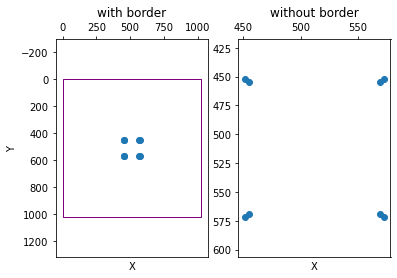

In [34]:
'''
Question 1  (1) 计算这 8 个顶点在图像平面的像素值
'''

import matplotlib.pyplot as plt


def real2ImgCrd(mat):
    x, y, z = mat
    f_m = 50  # mm
    w_ccd = 21.8  # mm
    h_ccd = 21.8  # mm
    p_x = 512  # px
    p_y = 512  # px
    w_img = 1024  # px
    h_img = 1024  # px
    u_img = f_m * w_img * x / w_ccd / z + p_x
    v_img = f_m * h_img * y / h_ccd / z + p_y
    return u_img, v_img


cube = [
    [0.5, 0.5, 19.5],
    [0.5, 0.5, 20.5],
    [-0.5, 0.5, 19.5],
    [-0.5, 0.5, 20.5],
    [-0.5, -0.5, 19.5],
    [-0.5, -0.5, 20.5],
    [0.5, -0.5, 19.5],
    [0.5, -0.5, 20.5]
]

x_img = []
y_img = []

for i, c in enumerate(cube):
    x, y = real2ImgCrd(c)
    print("{}: x = {}, y = {}".format(i, round(x), round(y)))
    x_img.append(round(x))
    y_img.append(round(y))

plt.figure()

# figure with image border
plt.subplot(1,2,1)
ax = plt.gca()
ax.xaxis.set_ticks_position('top')  #将x轴的位置设置在顶部
ax.yaxis.set_ticks_position('left')  #将y轴的位置设置在右边
ax.invert_yaxis()  #y轴反向
plt.scatter(x_img, y_img)
plt.xlabel("X")
plt.ylabel("Y")
plt.gca().add_patch(plt.Rectangle([0, 0], 1024, 1024,fill=False,color='purple'))
plt.axis('equal')
plt.title('with border')
# plt.xlim(0,1024)
# plt.ylim(0,1024)

# figure without image border
plt.subplot(1,2,2)
ax = plt.gca()
ax.xaxis.set_ticks_position('top')  #将x轴的位置设置在顶部
ax.yaxis.set_ticks_position('left')  #将y轴的位置设置在右边
ax.invert_yaxis()  #y轴反向
plt.scatter(x_img, y_img)
plt.xlabel("X")
plt.axis('equal')
plt.title('without border')
plt.show()


In [ ]:
'''
Question 1 (2)分析这 8 个顶点的遮挡关系
'''

# 如上图所示，由于立方体正对视线，所以立方体的四个顶点具有透视关系。
# 相对靠外的四个点在后面，靠前的点在前面。



In real world 0: [10.18, 0.50, 16.64].	In img 0: [ 1949, 583 ]
In real world 1: [10.68, 0.50, 17.50].	In img 1: [ 1945, 579 ]
In real world 2: [9.32, 0.50, 17.14].	In img 2: [ 1789, 581 ]
In real world 3: [9.82, 0.50, 18.00].	In img 3: [ 1793, 577 ]
In real world 4: [9.32, -0.50, 17.14].	In img 4: [ 1789, 443 ]
In real world 5: [9.82, -0.50, 18.00].	In img 5: [ 1793, 447 ]
In real world 6: [10.18, -0.50, 16.64].	In img 6: [ 1949, 441 ]
In real world 7: [10.68, -0.50, 17.50].	In img 7: [ 1945, 445 ]


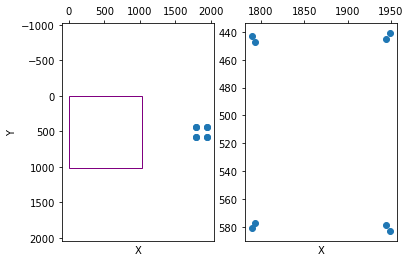

In [38]:
'''
Question 1 (3)如果这立方体绕着 y 轴旋转 30°，尝试计算他们在三维空间的新的坐标和成像
'''

import matplotlib.pyplot as plt
import numpy as np
from scipy import linalg


def real2ImgCrd(mat):
    x, y, z = mat
    f_m = 50  # mm
    w_ccd = 21.8  # mm
    h_ccd = 21.8  # mm
    p_x = 512  # px
    p_y = 512  # px
    w_img = 1024  # px
    h_img = 1024  # px
    u_img = f_m * w_img * x / w_ccd / z + p_x
    v_img = f_m * h_img * y / h_ccd / z + p_y
    return u_img, v_img


# 计算旋转矩阵 https://blog.csdn.net/youngdianfeng/article/details/113142805
def rotate_mat(axis=[0, 1, 0], radian=30):
    """
    :param axis: 旋转轴
    :param radian: 欧拉角
    :return: 旋转矩阵
    """
    radian = radian * np.pi / 180
    """
    np.eye(x)： 生成一个x维的，只有主对角线为1，其他位置为0的矩阵
    np.linalg.norm(): 求矩阵的2范数
    np.cross(x,y): 矩阵x和y的叉乘
    """
    rot_matrix = linalg.expm(np.cross(np.eye(3), axis / np.linalg.norm(axis) * radian))
    return rot_matrix


cube = [
    [0.5, 0.5, 19.5],
    [0.5, 0.5, 20.5],
    [-0.5, 0.5, 19.5],
    [-0.5, 0.5, 20.5],
    [-0.5, -0.5, 19.5],
    [-0.5, -0.5, 20.5],
    [0.5, -0.5, 19.5],
    [0.5, -0.5, 20.5]
]

x_img = []
y_img = []
r_mat = rotate_mat()
for i, c in enumerate(cube):
    rotated = np.dot(r_mat, c)
    x, y = real2ImgCrd(rotated)
    print("In real world {}: [{:.2f}, {:.2f}, {:.2f}].\tIn img {}: [ {}, {} ]".format(i, rotated[0], rotated[1],
                                                                                     rotated[2], i, round(x), round(y)))
    x_img.append(round(x))
    y_img.append(round(y))

plt.figure()

# figure with image border
plt.subplot(1,2,1)
ax = plt.gca()
ax.xaxis.set_ticks_position('top')  #将x轴的位置设置在顶部
ax.yaxis.set_ticks_position('left')  #将y轴的位置设置在右边
ax.invert_yaxis()  #y轴反向
plt.scatter(x_img, y_img)
plt.xlabel("X")
plt.ylabel("Y")
plt.gca().add_patch(plt.Rectangle([0, 0], 1024, 1024,fill=False,color='purple'))
plt.axis('equal')
# plt.xlim(0,1024)
# plt.ylim(0,1024)

# figure without image border
plt.subplot(1,2,2)
ax = plt.gca()
ax.xaxis.set_ticks_position('top')  #将x轴的位置设置在顶部
ax.yaxis.set_ticks_position('left')  #将y轴的位置设置在右边
ax.invert_yaxis()
plt.scatter(x_img, y_img)
plt.xlabel("X")

plt.show()

In [ ]:
'''
Question 2 尝试解释 dolly zoom 现象。
'''

# dolly zoom 中文名滑动变焦。设相机和人之间的距离为Z，焦距为f。
# 根据本节课程的学习，在物像大小不变的情况下，Z与f成线性关系。
#   Z=kf+b
# 即在增大拍摄距离的同时增加焦距，即可实现滑动变焦的效果。
# 对于观众而言，影片的主体大小没有变化，但背景却发生了拉伸，形成了特殊的视觉效果。